In [10]:
# Imports
!pip install neurokit2
import pandas as pd
from matplotlib.pyplot import figure
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images

In [11]:
df = pd.read_csv('ecgfile.csv')

In [12]:
df.columns = ['ECG']

In [13]:
df

,ECG
0,1782
1,1814
2,1638
3,1466
4,1466
...,...
2992,1490
2993,1511
2994,1536
2995,1627


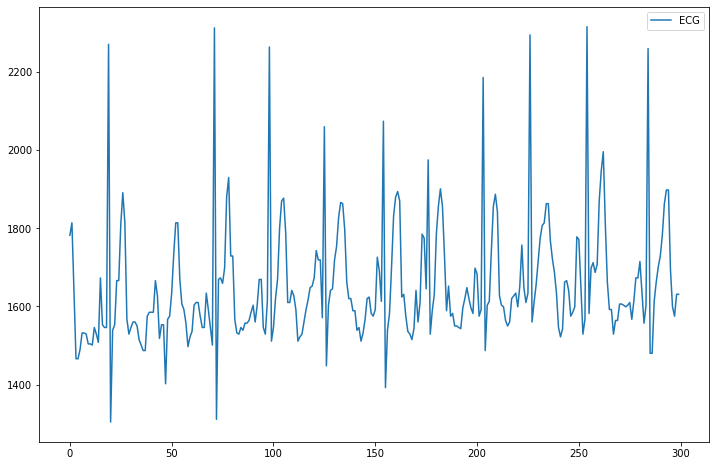

In [14]:
# Data plotted for first 300 points

ax = df[:300].plot(figsize=(12, 8))

In [15]:
df2, info = nk.ecg_process(df['ECG'], sampling_rate = 50)

/Users/syedhaider/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [16]:
df2

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_R_Onsets,ECG_R_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,1782,-15.520493,61.900192,0.000000,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,1814,-26.776694,61.900192,0.000000,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,1638,-141.056671,61.900192,0.000000,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,1466,-262.377427,61.900192,0.000000,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,1466,-290.752514,61.900192,0.000000,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,1490,18.558565,32.608696,0.601852,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2993,1511,32.187475,32.608696,0.601852,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2994,1536,78.283307,32.608696,0.601852,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2995,1627,98.809371,32.608696,0.601852,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


In [17]:
analyze_df = nk.ecg_analyze(df2, sampling_rate = 50)
analyze_df

,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,...,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_DFA,HRV_CorrDim
0,56.785301,818.762132,969.302326,649.576402,828.534242,0.670148,0.844692,680.0,385.476,0.566876,...,0.48074,468.268358,450.565467,0.527711,1.386294,NaN,NaN,NaN,0.364252,1.012678


In [22]:
_, rpeaks = nk.ecg_peaks(df['ECG'][:200], sampling_rate=50)

In [23]:
rpeaks

{'ECG_R_Peaks': array([ 19,  71,  98, 125, 154, 176]), 'sampling_rate': 50}

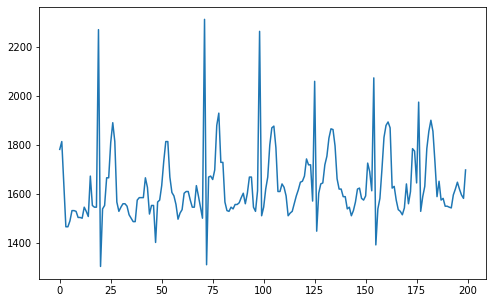

In [24]:
plot = df['ECG'][:200].plot()

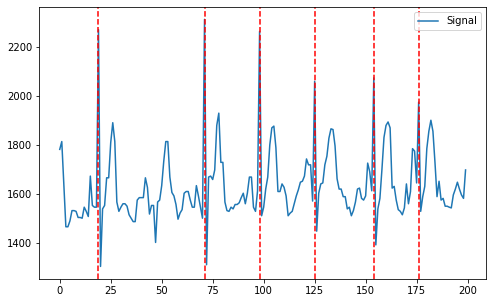

In [25]:
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], df['ECG'][:200])

In [32]:
_, waves_peak = nk.ecg_delineate(df['ECG'][:200], rpeaks, sampling_rate=50)

/Users/syedhaider/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [33]:
waves_peak

{'ECG_T_Peaks': [26, 78, 104, 133, 161, 182],
 'ECG_T_Onsets': [nan, 76, 102, 129, 158, 179],
 'ECG_T_Offsets': [28, 79, 107, 137, 164, 185],
 'ECG_P_Peaks': [nan, 52, 78, 105, 134, 161],
 'ECG_P_Onsets': [nan, 49, 75, 101, 129, 157],
 'ECG_P_Offsets': [nan, 54, 79, 107, 137, 164],
 'ECG_R_Onsets': [nan, 68, 94, 123, 152, 174],
 'ECG_R_Offsets': [21, 73, 101, 128, 154, 176]}

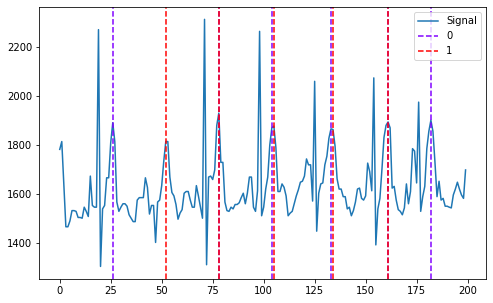

In [34]:
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks']], df['ECG'][:200])

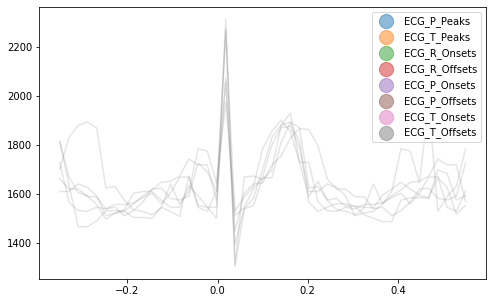

In [36]:
# Delineate the ECG signal
signal_cwt, waves_cwt = nk.ecg_delineate(df["ECG"], rpeaks, sampling_rate=50, method="cwt", show=True, show_type='all')